# Oil Spill Detection - Dataset Overview

**Project**: AI-Powered Oil Spill Detection using Satellite Imagery  
**Milestone 1**: Data Collection, Exploration and Preprocessing  
**Notebook**: Dataset Overview and Initial Exploration

## Objectives
- Load and explore the oil spill dataset structure
- Analyze dataset balance (spill vs non-spill images)
- Visualize sample images and corresponding masks
- Document key dataset characteristics

In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Define dataset paths
DATASET_ROOT = Path('../dataset')
TRAIN_IMAGES = DATASET_ROOT / 'train' / 'images'
TRAIN_MASKS = DATASET_ROOT / 'train' / 'masks'
VAL_IMAGES = DATASET_ROOT / 'val' / 'images'
VAL_MASKS = DATASET_ROOT / 'val' / 'masks'
TEST_IMAGES = DATASET_ROOT / 'test' / 'images'
TEST_MASKS = DATASET_ROOT / 'test' / 'masks'

# Create results directory
RESULTS_DIR = Path('../results')
RESULTS_DIR.mkdir(exist_ok=True)

print(f"Dataset root: {DATASET_ROOT}")
print(f"Results directory: {RESULTS_DIR}")

Dataset root: ..\dataset
Results directory: ..\results


In [3]:
# Function to count files in directory
def count_files(directory):
    if directory.exists():
        return len([f for f in directory.iterdir() if f.is_file()])
    return 0

# Dataset statistics
dataset_stats = {
    'Split': ['Train', 'Validation', 'Test'],
    'Images': [count_files(TRAIN_IMAGES), count_files(VAL_IMAGES), count_files(TEST_IMAGES)],
    'Masks': [count_files(TRAIN_MASKS), count_files(VAL_MASKS), count_files(TEST_MASKS)]
}

df_stats = pd.DataFrame(dataset_stats)
print("Dataset Statistics:")
print(df_stats)

# Save statistics
df_stats.to_csv(RESULTS_DIR / 'dataset_statistics.csv', index=False)
print(f"\nStatistics saved to {RESULTS_DIR / 'dataset_statistics.csv'}")

Dataset Statistics:
        Split  Images  Masks
0       Train     811    811
1  Validation     203    203
2        Test     254    254

Statistics saved to ..\results\dataset_statistics.csv


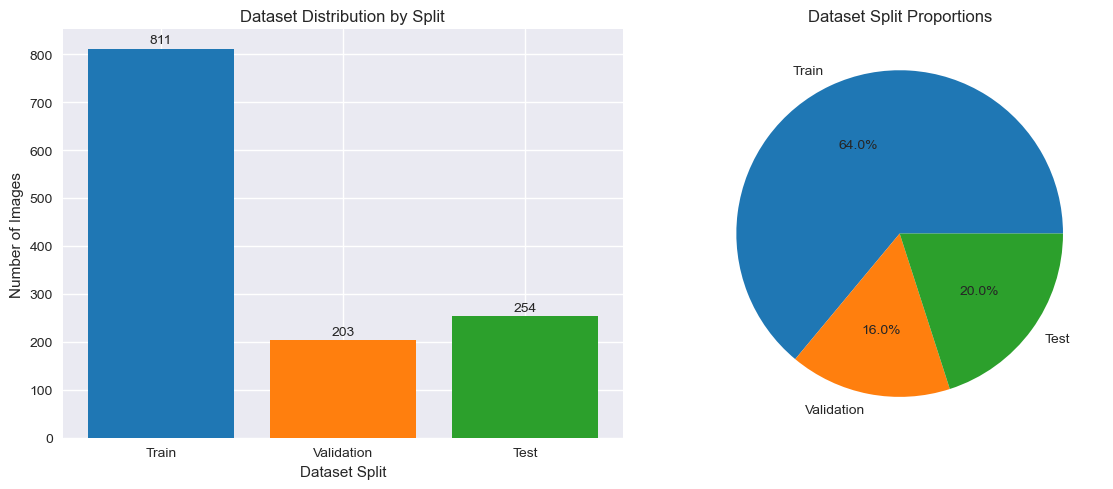

Dataset distribution plot saved to ..\results\dataset_distribution.png


In [4]:
# Visualize dataset distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for dataset splits
ax1.bar(df_stats['Split'], df_stats['Images'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax1.set_title('Dataset Distribution by Split')
ax1.set_ylabel('Number of Images')
ax1.set_xlabel('Dataset Split')

# Add value labels on bars
for i, v in enumerate(df_stats['Images']):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom')

# Pie chart for total distribution
ax2.pie(df_stats['Images'], labels=df_stats['Split'], autopct='%1.1f%%', 
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax2.set_title('Dataset Split Proportions')

plt.tight_layout()
plt.savefig(RESULTS_DIR / 'dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Dataset distribution plot saved to {RESULTS_DIR / 'dataset_distribution.png'}")

Training Set Samples:


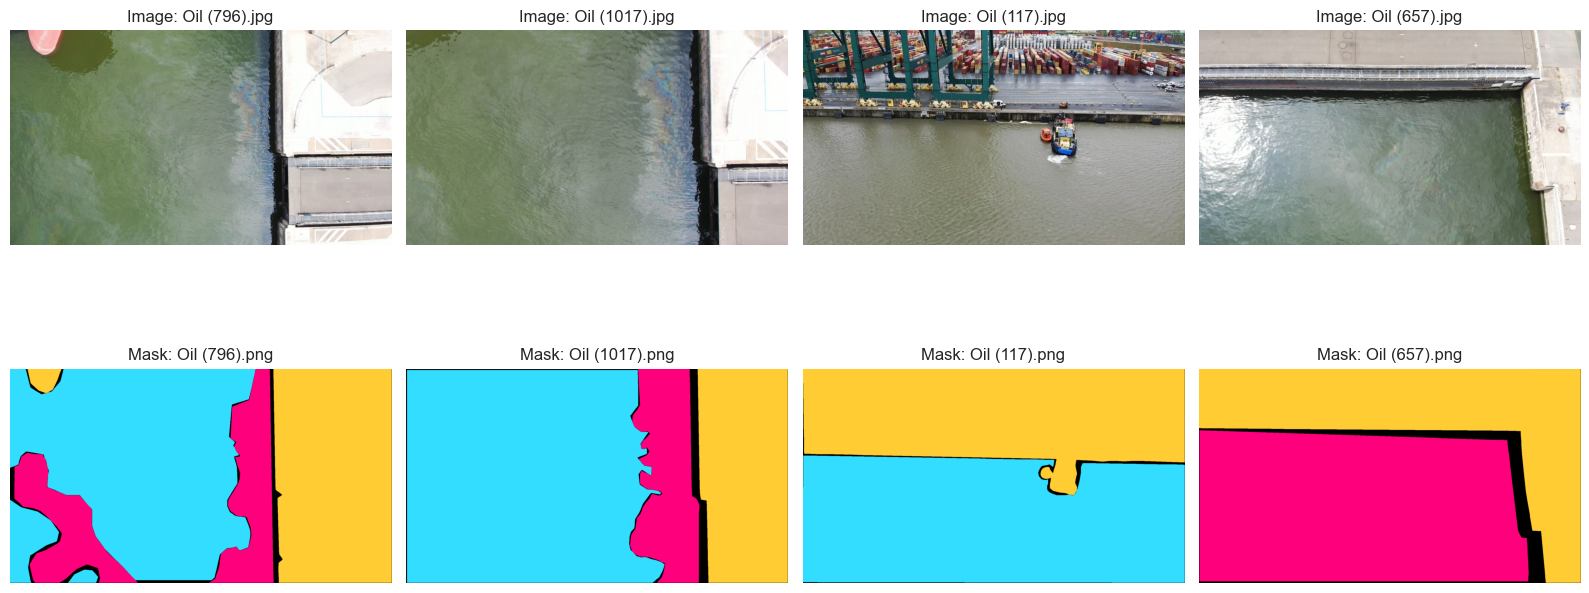

Training samples saved to ..\results\train_samples.png


In [17]:
# Function to load and display sample images
def display_sample_images(image_dir, mask_dir, num_samples=4):
    image_files = list(image_dir.glob('*'))
    
    if len(image_files) == 0:
        print(f"No images found in {image_dir}")
        return
    
    # Select random samples
    sample_files = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)
    
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 8))
    
    for i, img_path in enumerate(sample_files):
        # Load image
        image = Image.open(img_path)
        
        # Find corresponding mask
        mask_path = mask_dir / img_path.with_suffix('.png').name
        
        # Display image
        axes[0, i].imshow(image)
        axes[0, i].set_title(f'Image: {img_path.name}')
        axes[0, i].axis('off')
        
        # Display mask if exists
        if mask_path.exists():
            mask = Image.open(mask_path)
            axes[1, i].imshow(mask, cmap='gray')
            axes[1, i].set_title(f'Mask: {mask_path.name}')
        else:
            axes[1, i].text(0.5, 0.5, 'No Mask', ha='center', va='center')
            axes[1, i].set_title('Mask: Not Found')
        
        axes[1, i].axis('off')
    
    plt.tight_layout()
    return fig

# Display training samples
print("Training Set Samples:")
fig_train = display_sample_images(TRAIN_IMAGES, TRAIN_MASKS, 4)
if fig_train:
    fig_train.savefig(RESULTS_DIR / 'train_samples.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Training samples saved to {RESULTS_DIR / 'train_samples.png'}")

In [18]:
# Analyze image properties
def analyze_image_properties(image_dir, sample_size=50):
    image_files = list(image_dir.glob('*'))[:sample_size]
    
    properties = {
        'width': [],
        'height': [],
        'channels': [],
        'file_size_mb': []
    }
    
    for img_path in image_files:
        try:
            image = Image.open(img_path)
            width, height = image.size
            channels = len(image.getbands())
            file_size = img_path.stat().st_size / (1024 * 1024)  # MB
            
            properties['width'].append(width)
            properties['height'].append(height)
            properties['channels'].append(channels)
            properties['file_size_mb'].append(file_size)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
    
    return pd.DataFrame(properties)

# Analyze training images
if TRAIN_IMAGES.exists():
    print("Analyzing image properties...")
    props_df = analyze_image_properties(TRAIN_IMAGES)
    
    print("\nImage Properties Summary:")
    print(props_df.describe())
    
    # Save properties
    props_df.to_csv(RESULTS_DIR / 'image_properties.csv', index=False)
    print(f"\nImage properties saved to {RESULTS_DIR / 'image_properties.csv'}")
else:
    print("Training images directory not found")

Analyzing image properties...

Image Properties Summary:
        width  height  channels  file_size_mb
count    50.0    50.0      50.0     50.000000
mean   1920.0  1080.0       3.0      0.575284
std       0.0     0.0       0.0      0.074235
min    1920.0  1080.0       3.0      0.400384
25%    1920.0  1080.0       3.0      0.528521
50%    1920.0  1080.0       3.0      0.555287
75%    1920.0  1080.0       3.0      0.602627
max    1920.0  1080.0       3.0      0.859797

Image properties saved to ..\results\image_properties.csv


## Summary

This notebook provides an initial overview of the oil spill detection dataset:

1. **Dataset Structure**: Analyzed the train/validation/test split distribution
2. **Sample Visualization**: Displayed sample images with corresponding masks
3. **Image Properties**: Analyzed dimensions, channels, and file sizes
4. **Documentation**: Saved all statistics and visualizations to results directory

**Next Steps**: Proceed to detailed preprocessing in notebook 02_preprocessing.ipynb